In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix , roc_auc_score, roc_curve

In [64]:
# Load the breast cancer dataset
df = pd.read_csv("Breast_Cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [65]:
df["diagnosis"] = df["diagnosis"].replace({"M":0 , "B":1}) 

In [66]:
x = df.drop(columns=["id" , "diagnosis" , "Unnamed: 32"])
y = df["diagnosis"]


In [67]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42 , shuffle=True , stratify=y)

In [68]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [69]:
# Predict on the test set
y_pred = model.predict(X_test)

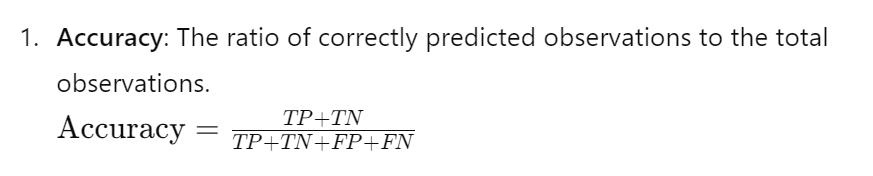

In [70]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9473684210526315


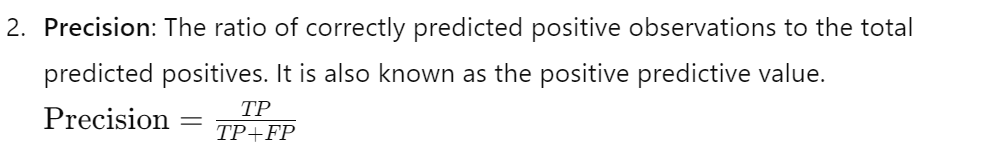

In [71]:
# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.9375


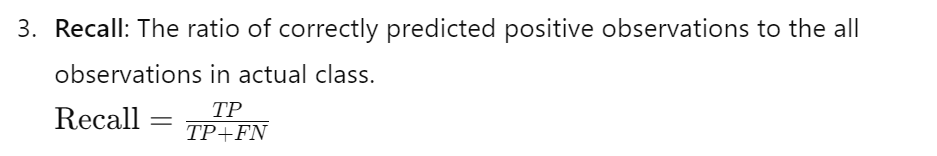

In [72]:
# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.9813084112149533


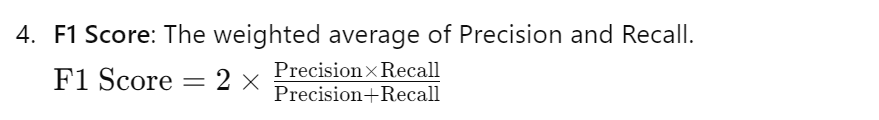

In [73]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.958904109589041


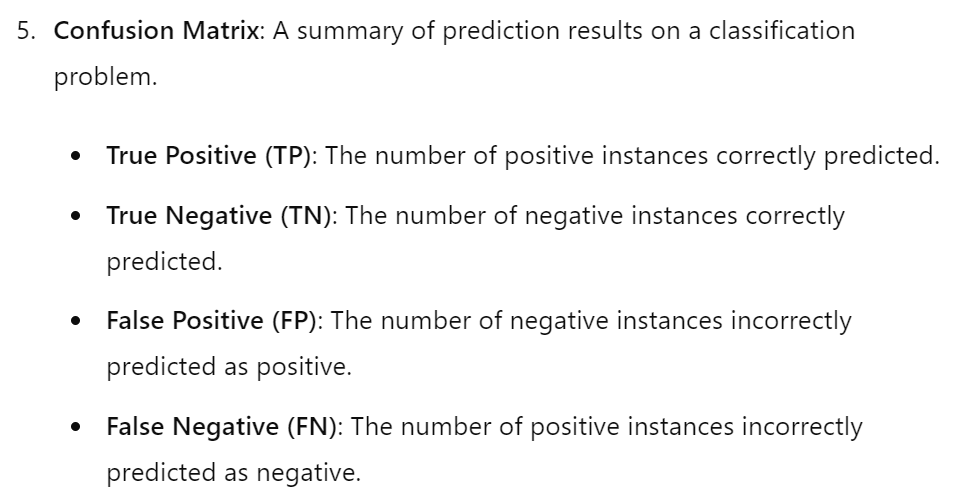

In [74]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 57   7]
 [  2 105]]


# roc_auc_score, roc_curve

In [77]:
# Train a Logistic Regression model
model2 = LogisticRegression(max_iter=10000)
model2.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [79]:
# Predict probabilities on the test set
y_pred_prob = model2.predict_proba(X_test)[:, 1]
y_pred2 = model2.predict(X_test)

In [80]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred2)

In [81]:
# Print metrics
print("Metrics:")
print(f"  Accuracy: {accuracy}")
print(f"  Precision: {precision}")
print(f"  Recall: {recall}")
print(f"  F1 Score: {f1}")
print(f"  AUC: {auc}")
print(f"  Confusion Matrix:\n{conf_matrix}")

Metrics:
  Accuracy: 0.9473684210526315
  Precision: 0.9375
  Recall: 0.9813084112149533
  F1 Score: 0.958904109589041
  AUC: 0.9887558411214953
  Confusion Matrix:
[[ 57   7]
 [  2 105]]


In [82]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

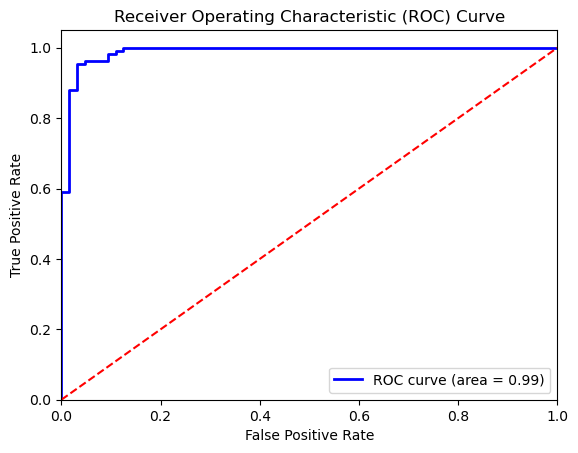

In [83]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()